In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymatgen.core.composition import Composition

In [2]:
df = pd.read_csv('./data/02_7_after_e_hull_screening.csv')
df

,id,composition,roost_ensemble_mean,e_hull_from_roost
0,1,Na1Li6S4,-1.361550,0.066127
1,2,Li17Se6S5,-1.418221,-0.064147
2,3,Li1Se2S1,-0.717415,-0.067441
3,5,Na5Li1S2,-0.968061,0.012693
4,6,Li3Hg8S5,-0.395427,0.193329
...,...,...,...,...
314,431,Li1Pb2S1,-0.560796,0.199241
315,432,Li6Ga1S4,-1.404617,-0.001322
316,434,Li17Pb6S5,-0.763350,0.172872
317,436,Ba15Li2S19,-2.013019,0.103946


# Data processing for machine learning prediction

In [3]:
roost_df = pd.DataFrame(columns=['id','composition','target'])
roost_df['id'] = df.index
roost_df['composition'] = df['composition']
roost_df['target']=0
roost_df.to_csv('./data/03_1_unique_formula_for_roost.csv',index=False) # Instructions for the supervised machine learning model is described in https://github.com/CompRhys/roost

# Get machine learning prediction for bandgap

In [4]:
roost_band_gap_df = pd.read_csv('./data/03_2_band_gap_roost.csv') 
roost_band_gap_df.drop(['target'],axis=1,inplace=True)
roost_band_gap_df

,id,composition,pred_0
0,0,Na1Li6S4,3.103082
1,1,Li17Se6S5,2.161156
2,2,Li1Se2S1,2.719070
3,3,Na5Li1S2,2.516691
4,4,Li3Hg8S5,0.854263
...,...,...,...
314,314,Li1Pb2S1,0.188154
315,315,Li6Ga1S4,2.905212
316,316,Li17Pb6S5,0.511936
317,317,Ba15Li2S19,2.870701


# E above hull histogram for every unique formular

<AxesSubplot:xlabel='pred_0', ylabel='Count'>

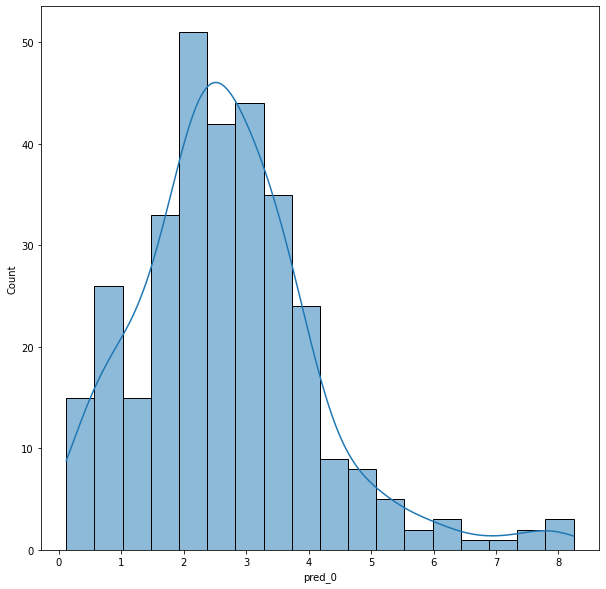

In [5]:
plt.figure(figsize=(10,10))
sns.histplot(data=roost_band_gap_df, x="pred_0", kde=True)

In [6]:
e_gap_screen_final_df=roost_band_gap_df[roost_band_gap_df['pred_0']>0.5].rename(columns={'pred_0':'roost_band_gap'})
# e gap 기준 0.5
e_gap_screen_final_df['pretty_formula'] = [Composition(i).reduced_formula for i in e_gap_screen_final_df['composition']]
e_gap_screen_final_df

,id,composition,roost_band_gap,pretty_formula
0,0,Na1Li6S4,3.103082,Na(Li3S2)2
1,1,Li17Se6S5,2.161156,Li17Se6S5
2,2,Li1Se2S1,2.719070,LiSe2S
3,3,Na5Li1S2,2.516691,Na5LiS2
4,4,Li3Hg8S5,0.854263,Li3Hg8S5
...,...,...,...,...
313,313,Li2Sn15S19,0.757977,Li2Sn15S19
315,315,Li6Ga1S4,2.905212,Li6GaS4
316,316,Li17Pb6S5,0.511936,Li17Pb6S5
317,317,Ba15Li2S19,2.870701,Ba15Li2S19


In [7]:
after_egap_hull_df = pd.merge(df,e_gap_screen_final_df,on='composition',how='inner')
after_egap_hull_df

,id_x,composition,roost_ensemble_mean,e_hull_from_roost,id_y,roost_band_gap,pretty_formula
0,1,Na1Li6S4,-1.361550,0.066127,0,3.103082,Na(Li3S2)2
1,2,Li17Se6S5,-1.418221,-0.064147,1,2.161156,Li17Se6S5
2,3,Li1Se2S1,-0.717415,-0.067441,2,2.719070,LiSe2S
3,5,Na5Li1S2,-0.968061,0.012693,3,2.516691,Na5LiS2
4,6,Li3Hg8S5,-0.395427,0.193329,4,0.854263,Li3Hg8S5
...,...,...,...,...,...,...,...
301,430,Li2Sn15S19,-0.768460,0.005445,313,0.757977,Li2Sn15S19
302,432,Li6Ga1S4,-1.404617,-0.001322,315,2.905212,Li6GaS4
303,434,Li17Pb6S5,-0.763350,0.172872,316,0.511936,Li17Pb6S5
304,436,Ba15Li2S19,-2.013019,0.103946,317,2.870701,Ba15Li2S19


In [8]:
after_egap_hull_df.drop(['id_x','id_y'],axis=1).to_csv('./data/03_3_after_band_gap_screening.csv',index=False)